<a href="https://colab.research.google.com/github/renanwta/IDEB/blob/main/An%C3%A1lise_dados_Notas_Ideb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Índice de Desenvolvimento da Educação Básica (Ideb)


#   1 - Importando os dados



Fazer um estudo apra observar se há uma diferença nas notas do INEP entre as escolas publicas, estaduais, municipais e Particulares

Observar também se há uma diferença de notas em cada ano ou se ao longo do ano as medias abaixando ou aumentam.

https://basedosdados.org/dataset/96eab476-5d30-459b-82be-f888d4d0d6b9?table=bc84dea9-1126-4423-86d2-8835e6b19a72

In [ ]:
# Para trazer os dados do Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Para importação de dados
import pandas as pd
# Para gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
dados = pd.read_csv('/content/drive/MyDrive/Portifólio collab/Datasets/brasil.csv',sep = ',')

In [ ]:
dados

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,estadual,fundamental,finais (6-9),76.3,0.763635,232.86,226.60,4.324370,3.3,NaN
1,2005,estadual,fundamental,iniciais (1-5),85.5,0.863753,181.13,172.19,4.551878,3.9,NaN
2,2005,estadual,medio,todos (1-4),70.5,0.747708,260.02,248.69,4.064599,3.0,NaN
3,2005,municipal,fundamental,finais (6-9),73.2,0.740564,228.44,222.53,4.182879,3.1,NaN
4,2005,municipal,fundamental,iniciais (1-5),78.1,0.795953,174.86,165.07,4.302433,3.4,NaN
...,...,...,...,...,...,...,...,...,...,...,...
121,2021,privada,fundamental,finais (6-9),98.6,0.986248,292.52,288.82,6.355667,6.3,NaN
122,2021,total,medio,todos (1-4),90.8,0.900923,271.00,275.97,4.626981,4.2,NaN
123,2021,estadual,medio,todos (1-4),89.8,0.894545,262.37,269.54,4.409516,3.9,NaN
124,2021,pública,medio,todos (1-4),89.8,0.893798,262.71,269.79,4.418034,3.9,NaN


# 2 -  Conhencendo os dados



In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          126 non-null    int64  
 1   rede                         126 non-null    object 
 2   ensino                       126 non-null    object 
 3   anos_escolares               126 non-null    object 
 4   taxa_aprovacao               126 non-null    float64
 5   indicador_rendimento         126 non-null    float64
 6   nota_saeb_matematica         126 non-null    float64
 7   nota_saeb_lingua_portuguesa  126 non-null    float64
 8   nota_saeb_media_padronizada  126 non-null    float64
 9   ideb                         126 non-null    float64
 10  projecao                     98 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.0+ KB


In [ ]:

filtro1 = dados[(dados['ano'] == 2005)]
filtro1

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
0,2005,estadual,fundamental,finais (6-9),76.3,0.763635,232.86,226.60,4.324370,3.3,NaN
1,2005,estadual,fundamental,iniciais (1-5),85.5,0.863753,181.13,172.19,4.551878,3.9,NaN
2,2005,estadual,medio,todos (1-4),70.5,0.747708,260.02,248.69,4.064599,3.0,NaN
3,2005,municipal,fundamental,finais (6-9),73.2,0.740564,228.44,222.53,4.182879,3.1,NaN
4,2005,municipal,fundamental,iniciais (1-5),78.1,0.795953,174.86,165.07,4.302433,3.4,NaN
5,2005,privada,fundamental,finais (6-9),94.5,0.944993,293.54,275.50,6.150795,5.8,NaN
6,2005,privada,fundamental,iniciais (1-5),97.1,0.967712,226.13,211.41,6.123613,5.9,NaN
7,2005,privada,medio,todos (1-4),92.7,0.933066,333.30,306.88,5.964842,5.6,NaN
8,2005,publica,fundamental,finais (6-9),75.0,0.753133,231.61,225.41,4.283965,3.2,NaN
9,2005,publica,fundamental,iniciais (1-5),80.0,0.812696,177.08,167.58,4.390365,3.6,NaN


# 3 - Validação dos dados


## 3.1 Observando se existe dados nulos

In [ ]:
# Obersrvando se há dados nulos
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          126 non-null    int64  
 1   rede                         126 non-null    object 
 2   ensino                       126 non-null    object 
 3   anos_escolares               126 non-null    object 
 4   taxa_aprovacao               126 non-null    float64
 5   indicador_rendimento         126 non-null    float64
 6   nota_saeb_matematica         126 non-null    float64
 7   nota_saeb_lingua_portuguesa  126 non-null    float64
 8   nota_saeb_media_padronizada  126 non-null    float64
 9   ideb                         126 non-null    float64
 10  projecao                     98 non-null     float64
dtypes: float64(7), int64(1), object(3)
memory usage: 11.0+ KB


Nesse caso existem dados nulos na coluna de projeção, porém como não será utilziado essa coluna ela é irrelevante

## 3.2 Observar a presença de Outliers

Foi utilizado gráfico com boxplot e histigrama para observar se há outliers

In [ ]:
dados.rede.unique()

array(['estadual', 'municipal', 'privada', 'publica', 'total', 'pública'],
      dtype=object)

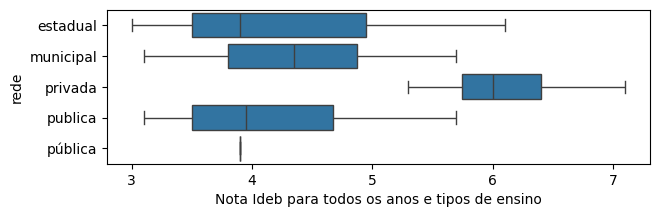

In [ ]:
plt.figure(figsize =(7,2))
ax = sns.boxplot( x = 'ideb',data = dados.query('rede != "total"'),y = 'rede')
ax.set_xlabel('Nota Ideb para todos os anos e tipos de ensino')

plt.show()

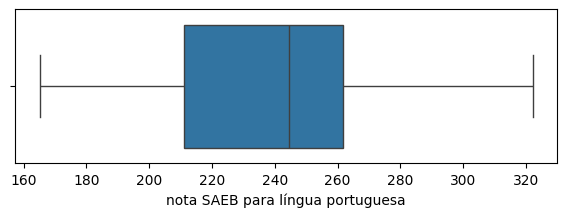

In [ ]:
plt.figure(figsize = (7,2))
ax = sns.boxplot( x = dados['nota_saeb_lingua_portuguesa'])
ax.set_xlabel('nota SAEB para língua portuguesa')

plt.show()

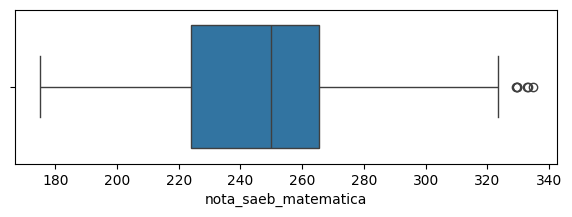

In [ ]:
plt.figure(figsize = (7,2))
sns.boxplot( x = dados['nota_saeb_matematica'])
ax.set_xlabel('nota SAEB matematica')

plt.show()

Nese caso, para as notas de matematica temos dados fora do boxplot, que representaria dados fora dos quartils, porém, a nota SAEB vai de 0 a 500 no entanto os dados estão dentro do permito pelo IDEB, assim dizemos que os dados não serão removidos.

Text(0, 0.5, '')

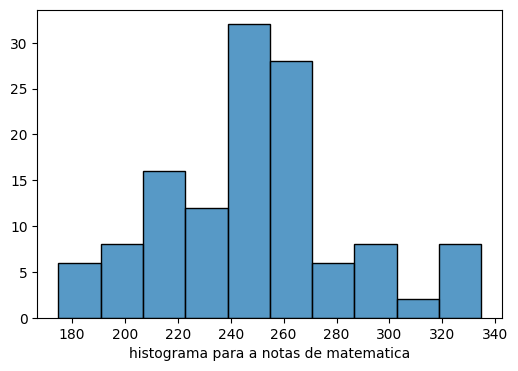

In [ ]:
plt.figure(figsize = (6,4))
ax = sns.histplot( data = dados, x = dados['nota_saeb_matematica'])
ax.set_xlabel('histograma para a notas de matematica')
ax.set_ylabel('')


In [ ]:
for col in dados.columns:
  print(f'Coluna {col}')
  print(dados[col].unique())
  print("--"*30)

Coluna ano
[2005 2007 2009 2011 2013 2015 2017 2019 2021]
------------------------------------------------------------
Coluna rede
['estadual' 'municipal' 'privada' 'publica' 'total' 'pública']
------------------------------------------------------------
Coluna ensino
['fundamental' 'medio']
------------------------------------------------------------
Coluna anos_escolares
['finais (6-9)' 'iniciais (1-5)' 'todos (1-4)']
------------------------------------------------------------
Coluna taxa_aprovacao
[76.3 85.5 70.5 73.2 78.1 94.5 97.1 92.7 75.  80.  70.6 77.  81.6 78.7
 88.  71.6 77.6 83.5 95.1 97.4 93.8 78.2 84.6 71.8 79.8 85.8 74.1 80.5
 91.1 73.5 78.6 86.2 94.6 97.6 93.3 79.7 87.3 73.7 81.3 88.5 75.9 82.3
 93.1 81.1 89.4 97.7 93.4 81.8 90.2 75.2 83.4 91.2 77.4 85.1 94.7 78.
 82.  97.8 83.7 91.8 80.1 85.3 94.8 82.8 91.6 95.3 98.1 84.1 92.2 85.7
 93.2 81.7 86.8 95.6 81.2 84.2 92.5 96.5 98.6 95.7 93.  81.4 87.1 94.
 83.1 90.  96.3 84.5 93.9 98.8 96.4 88.6 94.3 84.7 89.9 86.1 97.2 97.

## 3.3 Tratando os dados

Após utilziado o .unique( ) foi visto que na coluna rede possuimos a palavra 'pública' e 'publica', nesse caso iremos tratar e trocar as linhas que contém o 'pública' e remover o acento.

In [ ]:
# .Query() para puxar somente os dados com nome "pública" dentro da coluna "rede"
dados.query('rede == "pública"')

,ano,rede,ensino,anos_escolares,taxa_aprovacao,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa,nota_saeb_media_padronizada,ideb,projecao
124,2021,pública,medio,todos (1-4),89.8,0.893798,262.71,269.79,4.418034,3.9,NaN


In [ ]:
dados['rede'] = dados['rede'].str.replace('pública','publica')

In [ ]:
dados['rede'].unique()

array(['estadual', 'municipal', 'privada', 'publica', 'total'],
      dtype=object)

# 4 -  Analisando as notas dos IDEB para cada rede de escola por ano

Inicialmente para realizar a anális das notas do IDEB de cada rede por ano foi necessário fazer um filtro para que pudessemos pegar somente os dados essenciais.

In [ ]:
df_filtrado = dados[['ano','rede','ideb','ensino']]
df_filtrado

,ano,rede,ideb,ensino
0,2005,estadual,3.3,fundamental
1,2005,estadual,3.9,fundamental
2,2005,estadual,3.0,medio
3,2005,municipal,3.1,fundamental
4,2005,municipal,3.4,fundamental
...,...,...,...,...
121,2021,privada,6.3,fundamental
122,2021,total,4.2,medio
123,2021,estadual,3.9,medio
124,2021,publica,3.9,medio


In [ ]:
dados_filtrados_agrupados = df_filtrado.groupby(['ano','rede']).mean('ideb')
dados_filtrados_agrupados.head()

ideb
ano  rede               
2005 estadual   3.400000
     municipal  3.250000
     privada    5.766667
     publica    3.300000
     total      3.566667

## 4.1 Criando datasets para cada rede

Após a filtração dos dados feitos, foi necessário cirar um dataset separado para cada rede de modo que seja possível a análise separada.

Além disso, o agrupamento das notas do IDEB foi feita com a função "mean", já que possui diferenças de anos finais e iniciais, médio e fundamental ,foi feito a média entre essas notas para represetnar a nota do ano de cada rede

<Axes: xlabel='ano'>

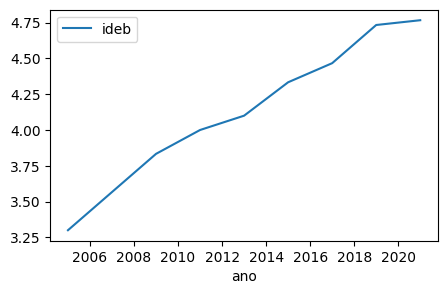

In [ ]:
## gráfico de barras para ver as difereça de notas entre os anos baseado na rede publica

dados_filtrados_agrupados_pública = df_filtrado.loc[df_filtrado['rede'] == 'publica',:]
dados_filtrados_agrupados_pública_groupby = dados_filtrados_agrupados_pública.groupby(['ano']).mean('ideb')
dados_filtrados_agrupados_pública_groupby.plot(kind = 'line',figsize = (5,3))

<Axes: xlabel='ano'>

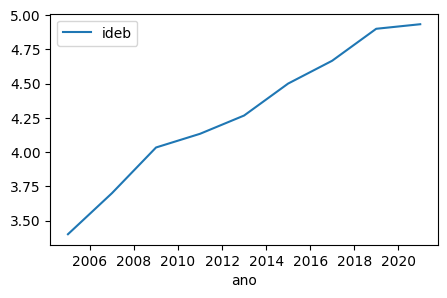

In [ ]:
## gráfico de barras para ver as difereça de notas entre os anos baseado na rede estadual

dados_filtrados_agrupados_estadual = df_filtrado.loc[df_filtrado['rede'] == 'estadual',:]
dados_filtrados_agrupados_estadual_groupby = dados_filtrados_agrupados_estadual.groupby(['ano']).mean('ideb')
dados_filtrados_agrupados_estadual_groupby.plot(kind = 'line',figsize = (5,3))

<Axes: xlabel='ano'>

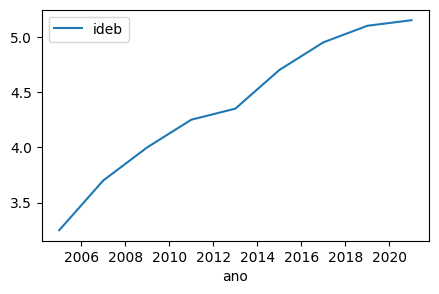

In [ ]:
## gráfico de barras para ver as difereça de notas entre os anos baseado na rede Municipal

dados_filtrados_agrupados_municipal = df_filtrado.loc[df_filtrado['rede'] == 'municipal',:]
dados_filtrados_agrupados_municipal_groupby = dados_filtrados_agrupados_municipal.groupby(['ano']).mean('ideb')
dados_filtrados_agrupados_municipal_groupby.plot(kind = 'line',figsize = (5,3))

<Axes: xlabel='ano'>

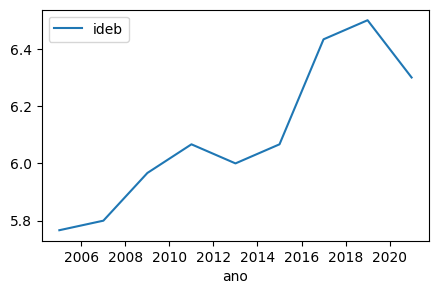

In [ ]:
## gráfico de barras para ver as difereça de notas entre os anos baseado na rede privada

dados_filtrados_agrupados_privada = df_filtrado.loc[df_filtrado['rede'] == 'privada',:]
dados_filtrados_agrupados_privada_groupby = dados_filtrados_agrupados_privada.groupby(['ano']).mean('ideb')
dados_filtrados_agrupados_privada_groupby.plot(kind = 'line',figsize = (5,3))

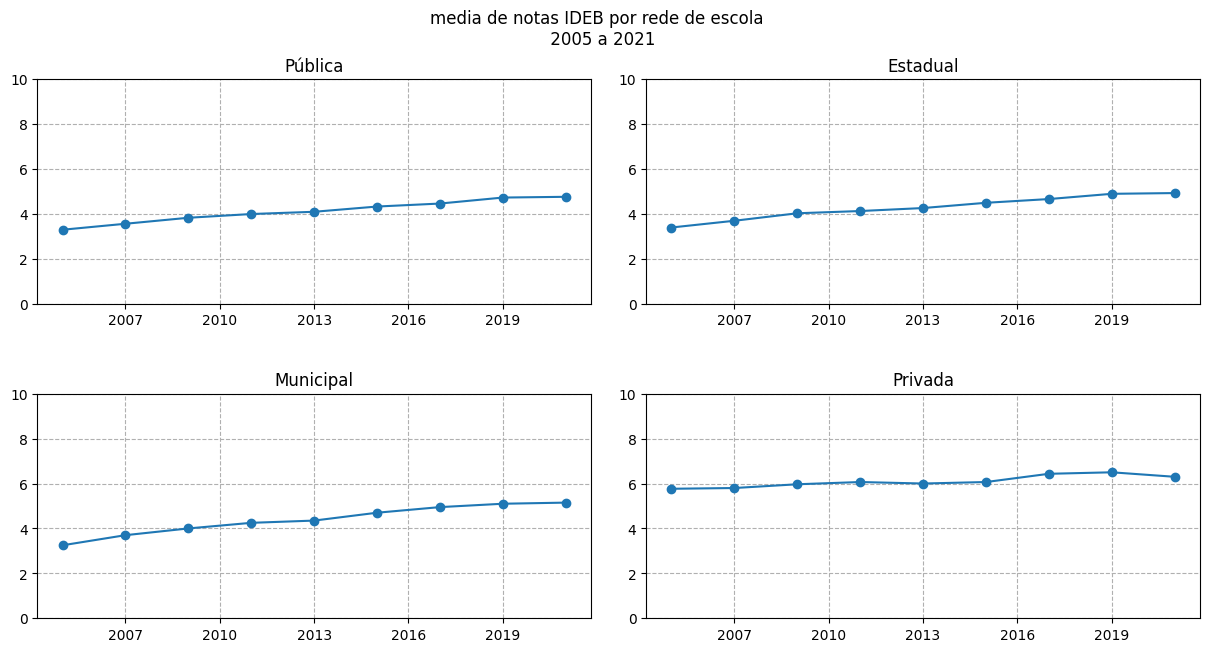

In [ ]:
fig, axs = plt.subplots(2,2, figsize = (15,7))
fig.subplots_adjust(hspace = 0.4, wspace = 0.1)
fig.suptitle('media de notas IDEB por rede de escola \n 2005 a 2021')

axs[0,0].plot(dados_filtrados_agrupados_pública_groupby['ideb'],marker = 'o')
axs[0,0].set_title('Pública')

axs[0,1].plot(dados_filtrados_agrupados_estadual_groupby['ideb'],marker = 'o')
axs[0,1].set_title('Estadual')


axs[1,0].plot(dados_filtrados_agrupados_municipal_groupby['ideb'],marker = 'o')
axs[1,0].set_title('Municipal')


axs[1,1].plot(dados_filtrados_agrupados_privada_groupby['ideb'],marker = 'o')
axs[1,1].set_title('Privada')


ymax = 10
ymin = 0

for ax in axs.ravel():
  ax.set_ylim(ymin, ymax)

for i in range(2):
  for j in range(2):
    axs[i,j].grid(True, linestyle = '--')
    axs[i,j].xaxis.set_major_locator(plt.MultipleLocator(3))



### Criando o gráfico com laços

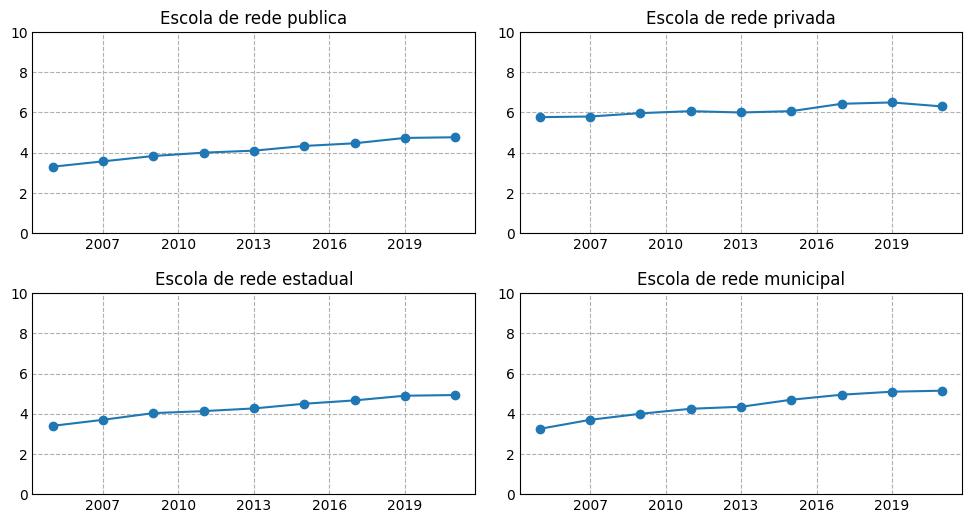

In [ ]:
## refazendo o código anterior com menos linhas usando laço duplo

Dic_rede = {0:'publica',
       1:'privada',
       2:'estadual',
       3: 'municipal'}

fig, axs = plt.subplots(2,2,figsize = (12,6))
fig.subplots_adjust(hspace = 0.3, wspace = 0.1)

dic_num = 0

for i in range(2):
  for j in range(2):
    dados_redes = dados.loc[dados['rede'] == Dic_rede[dic_num]]
    dados_redes_groupby = dados_redes.groupby(dados_redes['ano']).mean('ideb')
    axs[i,j].plot(dados_redes_groupby['ideb'], marker = 'o')
    axs[i,j].set_title(f'Escola de rede {Dic_rede[dic_num]}')
    dic_num +=1

ymax = 10
ymin = 0

for ax in axs.ravel():
  ax.set_ylim(ymin,ymax)

for i in range(2):
  for j in range(2):
    axs[i,j].grid(True,linestyle = '--')
    axs[i,j].xaxis.set_major_locator(plt.MultipleLocator(3))
    axs[i,j].tick_params(axis='both', which='both', length=0)


### Criando o único de linhas com várias variáveis

Aqui estamos pegandos os dados brutos e seleccioando as colunas que queremos trabalhar e retirando os valores que estão relacionado com total dentro da coluna rede

In [ ]:
dados.head()
df_lin = dados.query('rede != "total"')[['ano','rede','ideb']]
df_lin.head()

,ano,rede,ideb
0,2005,estadual,3.3
1,2005,estadual,3.9
2,2005,estadual,3.0
3,2005,municipal,3.1
4,2005,municipal,3.4


Para gerar um gráfico de várias váriaveis foi necessário a utilziação de crosstab para fazer um DF com axis ano e rede com valores da nota IDEB, além disso, foi usaddo dentro do agregação a função 'mean' que traz para gente a média dos valores.

In [ ]:
# Utilização do crosstab para fazer um novo df só que relacionando o ano com as redes

df_ano_rede = pd.crosstab(index = df_lin['ano'], columns = df_lin['rede'], values = df_lin['ideb'], aggfunc = 'mean')

df_ano_rede

rede,estadual,municipal,privada,publica
ano,,,,
2005,3.400000,3.25,5.766667,3.300000
2007,3.700000,3.70,5.800000,3.566667
2009,4.033333,4.00,5.966667,3.833333
2011,4.133333,4.25,6.066667,4.000000
2013,4.266667,4.35,6.000000,4.100000
2015,4.500000,4.70,6.066667,4.333333
2017,4.666667,4.95,6.433333,4.466667
2019,4.900000,5.10,6.500000,4.733333
2021,4.933333,5.15,6.300000,4.766667


Montando o gráfico

In [ ]:
# Criação de um gráfico interativo, importando plotly.expres para criar um gráfico de linhas
import plotly.express as px

fig = px.line(df_ano_rede, x = df_ano_rede.index, y = df_ano_rede.columns, markers = True)

fig.update_traces(mode="markers+lines", hovertemplate = "<b>Período:</b> %{x} <br> <b>Nota média do IDEB:</b> %{y}")
fig.update_layout(hovermode = "x unified")
fig.update_layout(hovermode="x unified")

fig.update_layout(yaxis = dict(tickformat = '.2f'))


fig.show()

## 4.2 Boxplots das Redes escolares


Aqui já podemos observar como estão se comportando as notas ao longo do tempo podendo observar que as notas IDEB estão aumentando gradativamente com redes de escola publica, estadual e municipal onde todos eles começaram com notas em média de 3,5 e em 2021 estão com notas 5


In [ ]:
import plotly.express as px
ax = px.box(dados, x = 'rede',y = 'ideb')

ax.update_xaxes(title_text = 'Rede de escola')
ax.update_yaxes(title_text = 'Nota IDEB')

Outro modo que podemos observar é a partir do boxplots onde é possível análisar a nota do IDEB para cada uma das redes.
A partir disso é possível observar que observando todas as notas do de cada rede, as escolas privadas sempre mantém uma mediana maior em relação aos outras reda, mostrando assim que o nível de escolaridade desse tipo de escola se mantém superior em relação aos demais

# 5 -  Estudar o nível de matematica e portugues por rede

Novamente temos que retirar o valores "total" dentro da coluna "rede", já que ela não é necessário

In [ ]:
dados_filtrados2 = dados.query('rede != "total" ')[['ano','rede','indicador_rendimento','nota_saeb_matematica','nota_saeb_lingua_portuguesa']]
dados_filtrados2

,ano,rede,indicador_rendimento,nota_saeb_matematica,nota_saeb_lingua_portuguesa
0,2005,estadual,0.763635,232.86,226.60
1,2005,estadual,0.863753,181.13,172.19
2,2005,estadual,0.747708,260.02,248.69
3,2005,municipal,0.740564,228.44,222.53
4,2005,municipal,0.795953,174.86,165.07
...,...,...,...,...,...
120,2021,publica,0.952226,252.04,254.88
121,2021,privada,0.986248,292.52,288.82
123,2021,estadual,0.894545,262.37,269.54
124,2021,publica,0.893798,262.71,269.79


In [ ]:
dados_filtrados2_agrupados = dados_filtrados2.groupby(['rede'])[['nota_saeb_matematica','nota_saeb_lingua_portuguesa']].mean().sort_values('nota_saeb_matematica')
dados_filtrados2_agrupados

,nota_saeb_matematica,nota_saeb_lingua_portuguesa
rede,,
municipal,224.701111,216.125000
publica,237.932222,231.317037
estadual,240.608889,234.022963
privada,288.615926,274.288519


<Axes: ylabel='rede'>

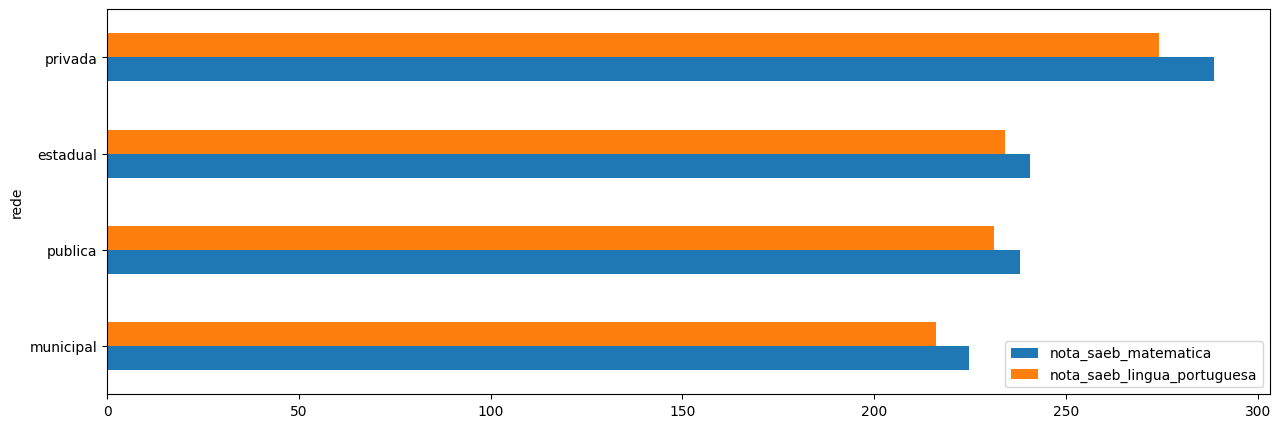

In [ ]:
dados_filtrados2_agrupados.plot(kind = 'barh',figsize = (15,5))